<a href="https://colab.research.google.com/github/Jurk06/database-from-local-drive/blob/main/Heberman_cancer_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels import robust

In [3]:
url='https://raw.githubusercontent.com/HoussemHosni/EDA-on-Haberman-Cancer-Survival-Data-set/master/haberman.csv'
df=pd.read_csv(url, header=None, names=["Age", "op_year", "axil_nodes_det", "surv_status"])
df.head()

,Age,op_year,axil_nodes_det,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.shape

(306, 4)

In [5]:
df.columns

Index(['Age', 'op_year', 'axil_nodes_det', 'surv_status'], dtype='object')

In [6]:
df.tail()

,Age,op_year,axil_nodes_det,surv_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [7]:
df['Age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64

In [8]:
df.describe()

,Age,op_year,axil_nodes_det,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
df[df.Age==df.Age.max()]

,Age,op_year,axil_nodes_det,surv_status
305,83,58,2,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             306 non-null    int64
 1   op_year         306 non-null    int64
 2   axil_nodes_det  306 non-null    int64
 3   surv_status     306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [11]:
df.surv_status.unique()

array([1, 2])

In [13]:
df.axil_nodes_det.unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28])

In [14]:
#modification_of_last_column

In [15]:
df.surv_status=df.surv_status.map({1:"yes",2:"No"}).astype("category")

In [16]:
df.head()

,Age,op_year,axil_nodes_det,surv_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [19]:
print(df.surv_status.unique())

['yes', 'No']
Categories (2, object): ['yes', 'No']


In [20]:
print(df.describe())

              Age     op_year  axil_nodes_det
count  306.000000  306.000000      306.000000
mean    52.457516   62.852941        4.026144
std     10.803452    3.249405        7.189654
min     30.000000   58.000000        0.000000
25%     44.000000   60.000000        0.000000
50%     52.000000   63.000000        1.000000
75%     60.750000   65.750000        4.000000
max     83.000000   69.000000       52.000000


In [21]:
df.describe()

,Age,op_year,axil_nodes_det
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [22]:
print("Hebarman Data set structure")
print("number of Data point ",df.shape[0])
print("Number of feature/independent variable",df.shape[1])
print("-"*50)
print(df.surv_status.value_counts(normalize=True))


Hebarman Data set structure
number of Data point  306
Number of feature/independent variable 4
--------------------------------------------------
yes    0.735294
No     0.264706
Name: surv_status, dtype: float64


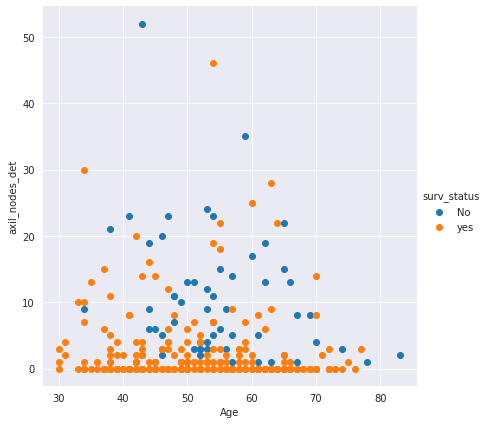

In [23]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="surv_status", height=6).map(plt.scatter, "Age", "axil_nodes_det").add_legend()
plt.show()

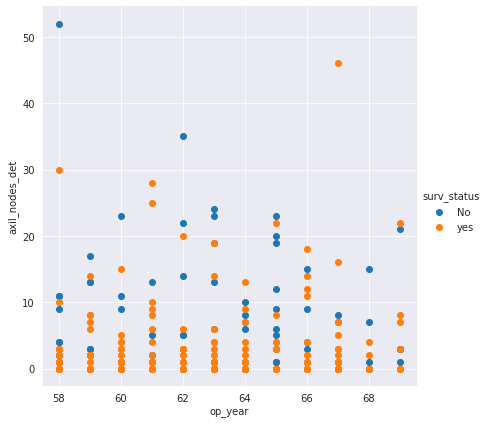

In [25]:
sns.FacetGrid(df, hue="surv_status", height=6).map(plt.scatter, "op_year", "axil_nodes_det").add_legend()
plt.show()


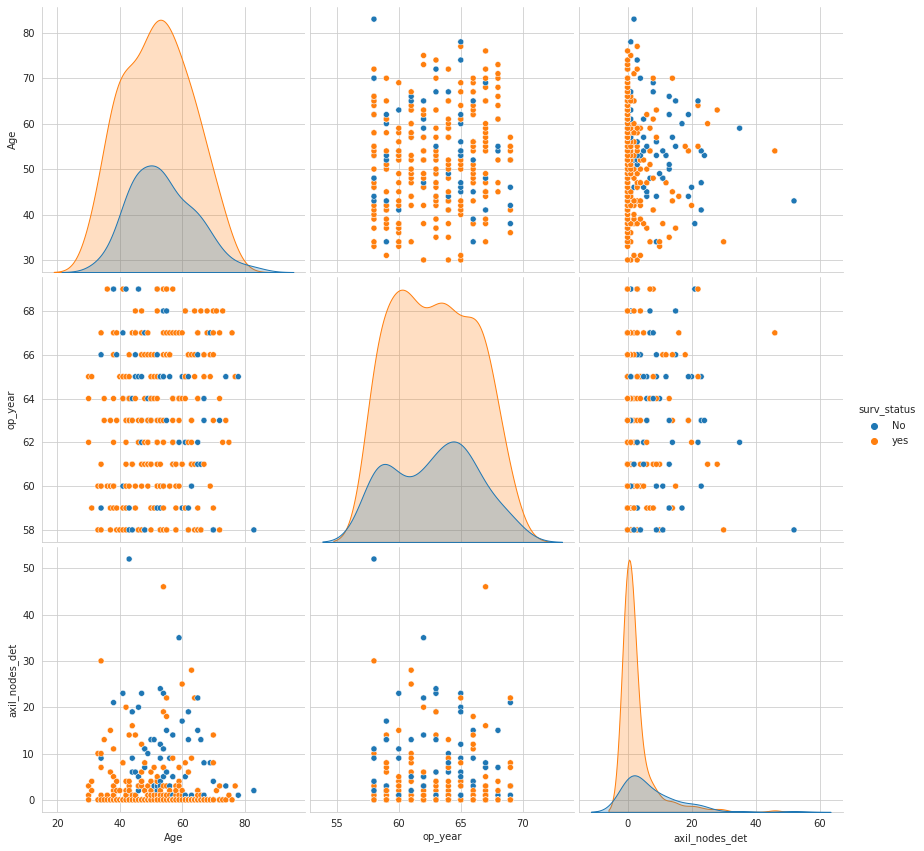

In [26]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue="surv_status", height=4)
plt.show()

In [28]:
from mpl_toolkits.mplot3d import Axes3D


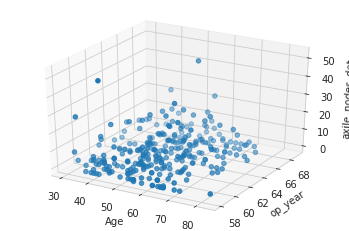

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
xs=df["Age"]
ys=df["op_year"]
zs=df["axil_nodes_det"]

ax.scatter(xs, ys, zs)

ax.set_xlabel("Age")
ax.set_ylabel("op_year")
ax.set_zlabel("axile_nodes_det")

plt.show()

In [32]:
yes_df=df[df.surv_status=='yes']
no_df=df[df.surv_status=='No']


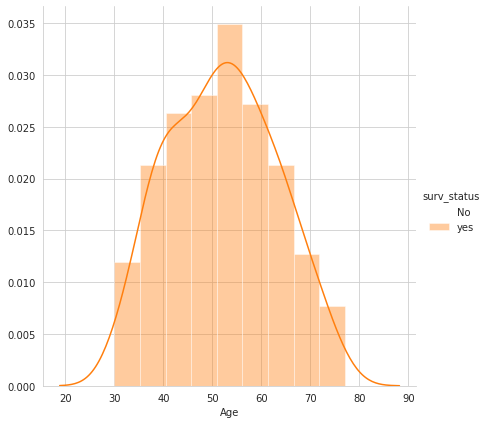

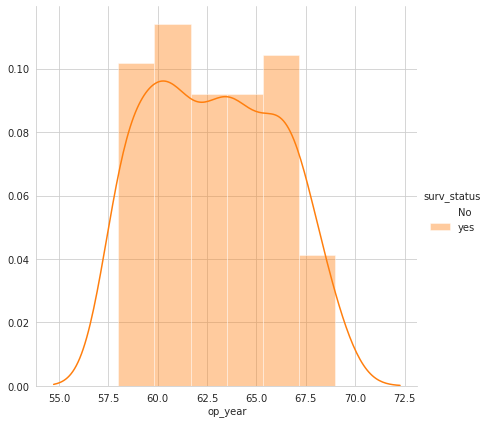

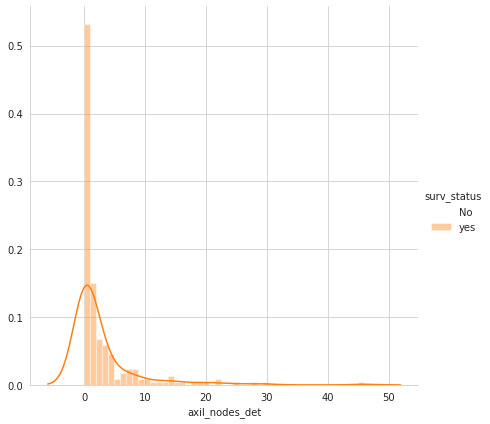

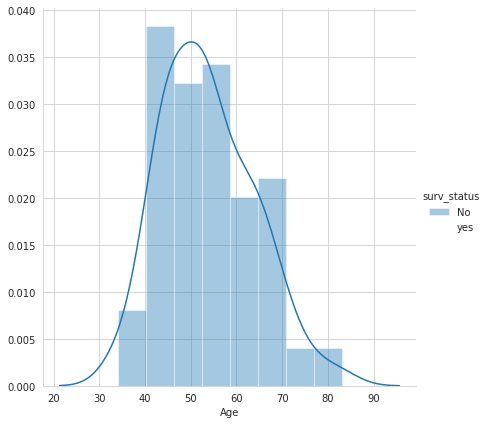

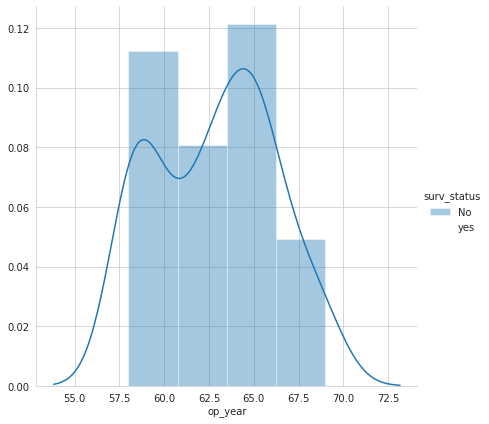

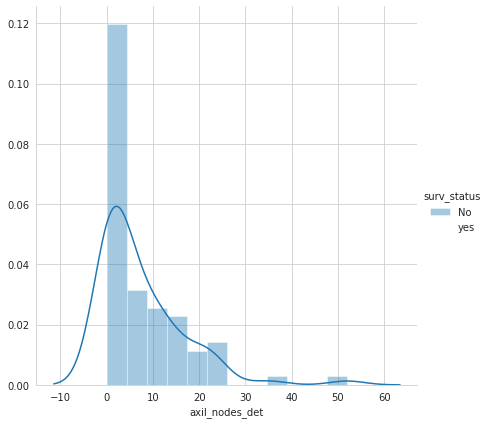

In [37]:
for dataF in [yes_df, no_df]:
  for column in df.columns[:-1]:
    sns.FacetGrid(dataF, hue="surv_status", height=6).map(sns.distplot, column).add_legend()
    plt.show()

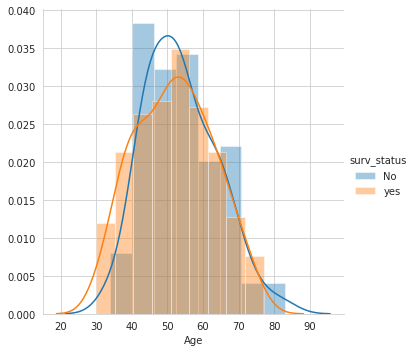

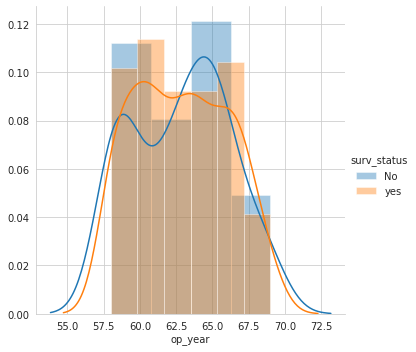

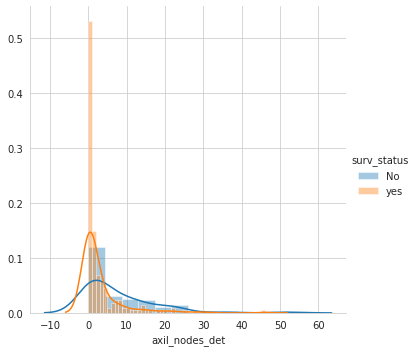

In [39]:
for column in df.columns[:-1]:
  sns.FacetGrid(df, hue="surv_status", height=5).map(sns.distplot, column).add_legend()
  plt.show()

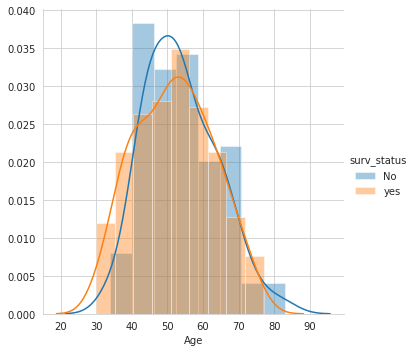

In [43]:
sns.FacetGrid(df, hue="surv_status", height=5).map(sns.distplot,"Age").add_legend()
plt.show()

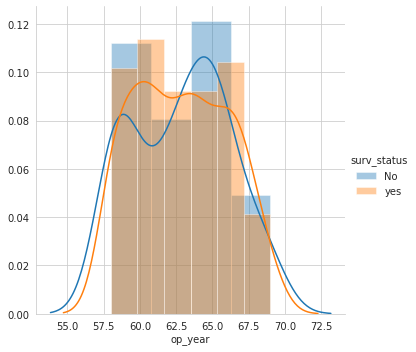

In [44]:
sns.FacetGrid(df, hue="surv_status", height=5).map(sns.distplot,"op_year").add_legend()
plt.show()

PDF and CDF of  Age variable.
PDF [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
bins_edge [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


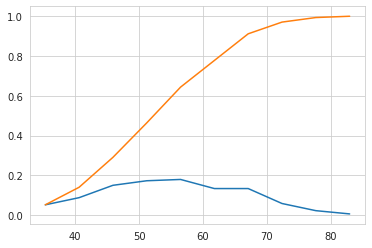

**********
PDF and CDF of  op_year variable.
PDF [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
bins_edge [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


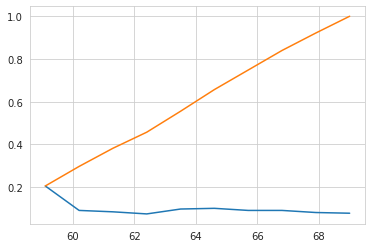

**********
PDF and CDF of  axil_nodes_det variable.
PDF [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]
bins_edge [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


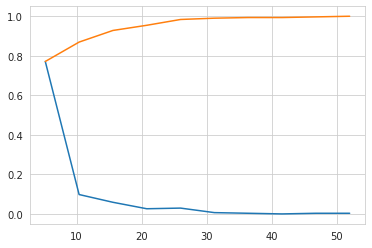

**********


In [48]:
for column in df.columns[:-1]:
  counts, bins_edge=np.histogram(df[column], bins=10, density=True)
  pdf=counts/sum(counts)
  cdf=np.cumsum(pdf)
  print("PDF and CDF of ", column, "variable.")
  print("PDF", pdf)
  print("CDF", cdf)
  print("bins_edge", bins_edge)
  plt.plot(bins_edge[1:], pdf)
  plt.plot(bins_edge[1:], cdf)
  plt.show()
  print("*"*10)

Pdf and Cdf of Age variable in dataFrame: yes _Df
PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
bin edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


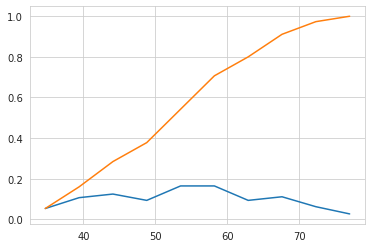

**************************************************
Pdf and Cdf of op_year variable in dataFrame: yes _Df
PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
bin edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


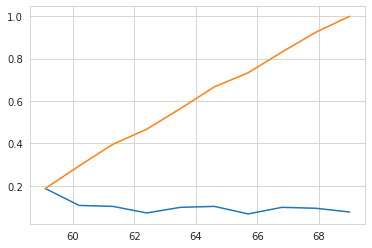

**************************************************
Pdf and Cdf of axil_nodes_det variable in dataFrame: yes _Df
PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


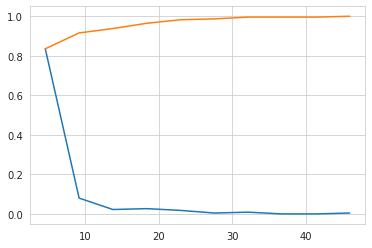

**************************************************
--------------------------------------------------
Pdf and Cdf of Age variable in dataFrame: No _Df
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
bin edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


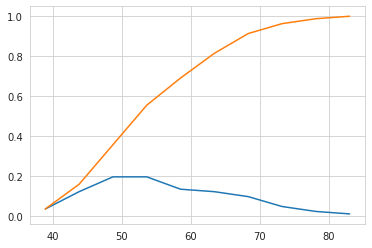

**************************************************
Pdf and Cdf of op_year variable in dataFrame: No _Df
PDF: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
bin edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


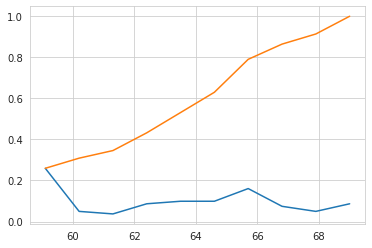

**************************************************
Pdf and Cdf of axil_nodes_det variable in dataFrame: No _Df
PDF: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


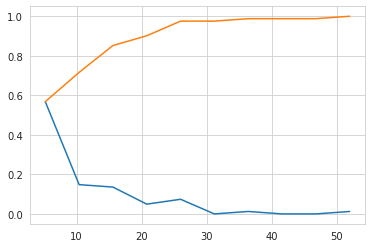

**************************************************
--------------------------------------------------


In [50]:
for dataF in [yes_df, no_df]:
  for column in df.columns[:-1]:
    counts, bin_edge=np.histogram(dataF[column], bins=10, density=True)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    print("Pdf and Cdf of", column,"variable in dataFrame:", dataF.surv_status.iloc[0], "_Df")
    print("PDF:", pdf)
    print("bin edges:", bin_edge)
    plt.plot(bin_edge[1:], pdf)
    plt.plot(bin_edge[1:], cdf)
    plt.show()
    print("*"*50)
  print("-"*50)


In [58]:
for column in ["Age", "axil_nodes_det"]:
  print("*"*50)
  print(column , "variable:")
  print("Mean")
  print(np.mean(df[column]))
  print("Std:")
  print(np.std(df[column]))
  print("Median:")
  print(np.median(df[column]))
  print("Quantiles:")
  print(np.percentile(df[column], np.arange(0,100,25)))
  print("90th Percentile")
  print(np.percentile(df[column], 90))
  print("Median Absolute Deviation")
  print(robust.mad(df[column]))


**************************************************
Age variable:
Mean
52.45751633986928
Std:
10.78578520363183
Median:
52.0
Quantiles:
[30.   44.   52.   60.75]
90th Percentile
67.0
Median Absolute Deviation
11.860817748044816
**************************************************
axil_nodes_det variable:
Mean
4.026143790849673
Std:
7.177896092811152
Median:
1.0
Quantiles:
[0. 0. 1. 4.]
90th Percentile
13.0
Median Absolute Deviation
1.482602218505602


In [57]:
df.columns

Index(['Age', 'op_year', 'axil_nodes_det', 'surv_status'], dtype='object')

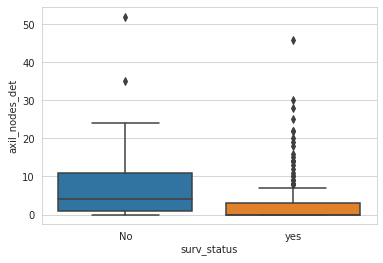

In [59]:
sns.boxplot(x="surv_status", y="axil_nodes_det", data=df)
plt.show()

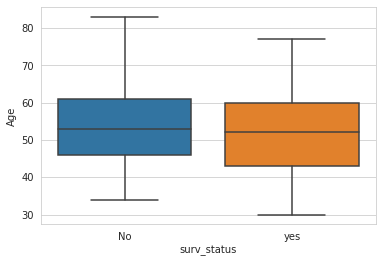

In [61]:
sns.boxplot(x="surv_status", y="Age", data=df)
plt.show()

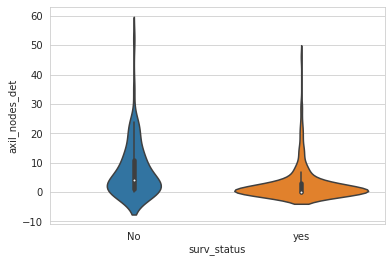

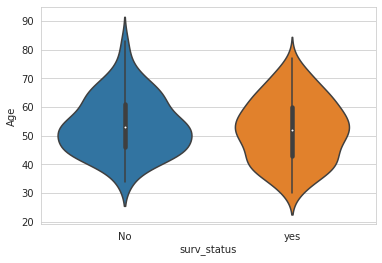

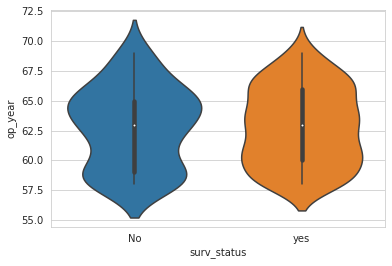

In [63]:
sns.violinplot(x="surv_status", y="axil_nodes_det", data=df)
plt.show()

sns.violinplot(x="surv_status", y="Age", data=df)
plt.show()

sns.violinplot(x="surv_status", y="op_year", data=df)
plt.show()

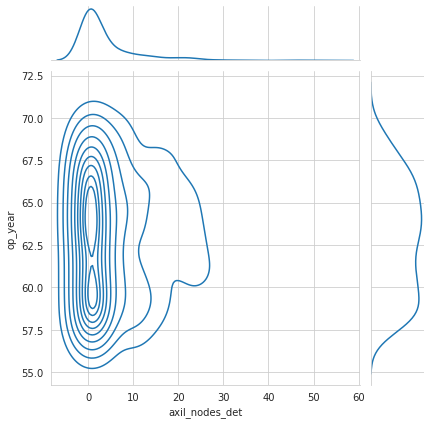

In [64]:
sns.jointplot(x="axil_nodes_det", y="op_year", data=df, kind="kde")
plt.show()